In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [2]:
mask = pd.read_csv("./raw_data/mask-use-by-county.csv")
cases = pd.read_csv("./raw_data/RAW_us_confirmed_cases.csv")
mandate = pd.read_csv("./raw_data/U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")

### I will find when mask mandate started in Bernalillo County, NM. Mask mandate seems to last the duration of covid, since it first came out.

In [5]:
mandate = mandate[(mandate['County_Name'] == 'Bernalillo County') & (mandate['State_Tribe_Territory'] == "NM")]
mandate

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
472550,NM,Bernalillo County,35,1,4/20/2020,2,NaN,NaN,NaN,NaN
472589,NM,Bernalillo County,35,1,4/21/2020,2,NaN,NaN,NaN,NaN
472983,NM,Bernalillo County,35,1,4/22/2020,2,NaN,NaN,NaN,NaN
473220,NM,Bernalillo County,35,1,4/23/2020,2,NaN,NaN,NaN,NaN
473335,NM,Bernalillo County,35,1,4/24/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1267665,NM,Bernalillo County,35,1,8/11/2021,1,Yes,Official,NaN,"N.M. Health Order (July 30, 2021)"
1267666,NM,Bernalillo County,35,1,8/12/2021,1,Yes,Official,NaN,"N.M. Health Order (July 30, 2021)"
1267667,NM,Bernalillo County,35,1,8/13/2021,1,Yes,Official,NaN,"N.M. Health Order (July 30, 2021)"
1267668,NM,Bernalillo County,35,1,8/14/2021,1,Yes,Official,NaN,"N.M. Health Order (July 30, 2021)"


In [51]:
mandate_date = mandate[mandate.Face_Masks_Required_in_Public == "Yes"]["date"].iloc[0]
mandate_date

'5/15/2020'

### I find the covid total cases that pertains to Bernalillo County, NM.

In [7]:
cases = cases[(cases.Admin2 == "Bernalillo") & (cases.Province_State == "New Mexico")]
cases

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21
1867,New Mexico,Bernalillo,84035001,US,USA,840,35001.0,US,35.051636,-106.670355,...,74239,74408,74523,74806,75035,75035,75035,75623,75770,75987


### I find the mask compliance data that pertains to Bernalillo County, NM.

In [8]:
mask = mask[mask.COUNTYFP == 35001]
mask

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1795,35001,0.036,0.014,0.057,0.135,0.758


In [9]:
population = 679121 #https://en.wikipedia.org/wiki/Bernalillo_County,_New_Mexico

### Now we will pivot the total cases table. We calculate the difference between consecutive days to find the new cases for each day. 

In [10]:
total_cases = cases.T.iloc[11:]

In [11]:
total_cases = total_cases.rename(columns = {1867:"covid_cases"})

In [12]:
new_cases = total_cases["covid_cases"].diff()

ten_day_new = new_cases.rolling(window=10).sum()

new_cases = new_cases['2/1/20':'10/15/21']
new_cases

2/1/20        0
2/2/20        0
2/3/20        0
2/4/20        0
2/5/20        0
           ... 
10/11/21      0
10/12/21    512
10/13/21    198
10/14/21    187
10/15/21    200
Name: covid_cases, Length: 623, dtype: object

In [13]:
total_cases = total_cases.rolling(window=7).mean().round()
smoothed_new_cases = total_cases["covid_cases"].diff()
smoothed_new_cases = smoothed_new_cases['2/1/20':'10/15/21']
smoothed_new_cases

2/1/20        0.0
2/2/20        0.0
2/3/20        0.0
2/4/20        0.0
2/5/20        0.0
            ...  
10/11/21    116.0
10/12/21    168.0
10/13/21    166.0
10/14/21    163.0
10/15/21    156.0
Name: covid_cases, Length: 623, dtype: float64

In [14]:
total_cases = total_cases['2/1/20':'10/15/21']
total_cases

,covid_cases
2/1/20,0.0
2/2/20,0.0
2/3/20,0.0
2/4/20,0.0
2/5/20,0.0
...,...
10/11/21,72575.0
10/12/21,72743.0
10/13/21,72909.0
10/14/21,73072.0


In [15]:
total_cases

,covid_cases
2/1/20,0.0
2/2/20,0.0
2/3/20,0.0
2/4/20,0.0
2/5/20,0.0
...,...
10/11/21,72575.0
10/12/21,72743.0
10/13/21,72909.0
10/14/21,73072.0


In [16]:
total_cases["at_risk_population"] = np.repeat(population, total_cases.size) - total_cases["covid_cases"]

In [17]:
total_cases["infection_rate"] = ten_day_new / total_cases.at_risk_population
total_cases = total_cases.reset_index()
# total_cases.index = pd.to_datetime(total_cases.index)

In [18]:
total_cases["date"] = total_cases["index"]
total_cases["date"] = pd.to_datetime(total_cases.date)

,index,covid_cases,at_risk_population,infection_rate,date
0,2/1/20,0.0,676444.0,0.000000,2020-02-01
1,2/2/20,0.0,676444.0,0.000000,2020-02-02
2,2/3/20,0.0,676444.0,0.000000,2020-02-03
3,2/4/20,0.0,676444.0,0.000000,2020-02-04
4,2/5/20,0.0,676444.0,0.000000,2020-02-05
...,...,...,...,...,...
618,10/11/21,72575.0,603869.0,0.002034,2021-10-11
619,10/12/21,72743.0,603701.0,0.002882,2021-10-12
620,10/13/21,72909.0,603535.0,0.003211,2021-10-13
621,10/14/21,73072.0,603372.0,0.002841,2021-10-14


In [19]:
labor_df = pd.read_csv('raw_data/BLS_Alberquerque.csv')
labor_df

,Year,Period,labor force,employment,unemployment,unemployment rate
0,2020,Jan,440332,419430,20902,4.7
1,2020,Feb,442706,422131,20575,4.6
2,2020,Mar,437598,415614,21984,5.0
3,2020,Apr,414535,371514,43021,10.4
4,2020,May,414464,371736,42728,10.3
5,2020,Jun,420489,378337,42152,10.0
6,2020,Jul,435095,378360,56735,13.0
7,2020,Aug,423306,385129,38177,9.0
8,2020,Sep,444293,407378,36915,8.3
9,2020,Oct,438584,404787,33797,7.7


In [20]:
labor_df['time'] = labor_df['Period'] + "/" + labor_df['Year'].astype(str)

In [38]:
labor_df.time = pd.to_datetime(labor_df.time, format='%b/%Y') + pd.tseries.offsets.MonthEnd(1)

In [22]:
labor_df

,Year,Period,labor force,employment,unemployment,unemployment rate,time
0,2020,Jan,440332,419430,20902,4.7,2020-01-01
1,2020,Feb,442706,422131,20575,4.6,2020-02-01
2,2020,Mar,437598,415614,21984,5.0,2020-03-01
3,2020,Apr,414535,371514,43021,10.4,2020-04-01
4,2020,May,414464,371736,42728,10.3,2020-05-01
5,2020,Jun,420489,378337,42152,10.0,2020-06-01
6,2020,Jul,435095,378360,56735,13.0,2020-07-01
7,2020,Aug,423306,385129,38177,9.0,2020-08-01
8,2020,Sep,444293,407378,36915,8.3,2020-09-01
9,2020,Oct,438584,404787,33797,7.7,2020-10-01


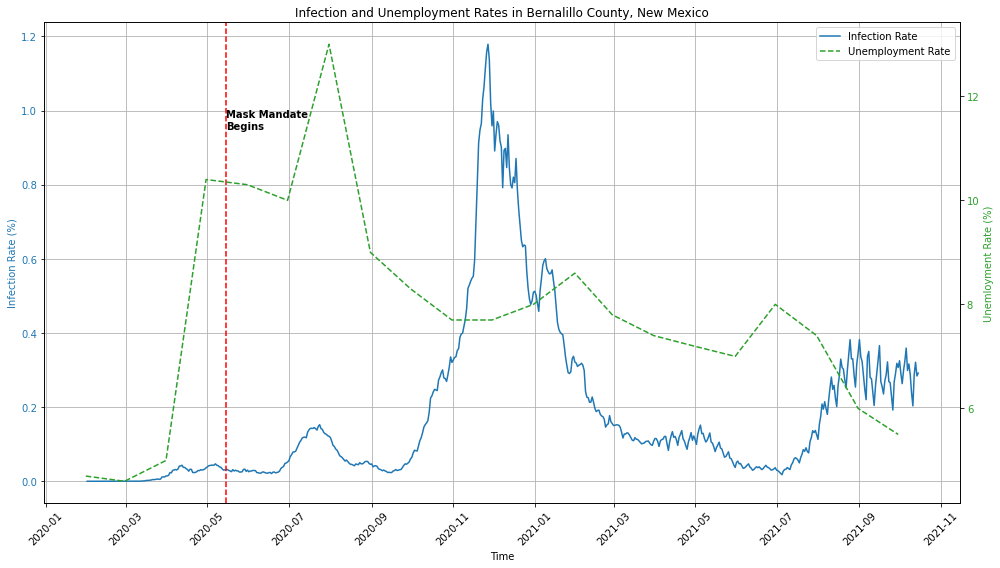

In [49]:
fig, ax1 = plt.subplots(figsize=(14,8))
color = "tab:blue"
lns1 = plt.plot(total_cases.date, total_cases.infection_rate*100, label="Infection Rate", color = color)
ax1.tick_params(axis='y', labelcolor=color)
plt.grid()
plt.xticks(total_cases.date[::60],  rotation=45)
plt.ylabel("Infection Rate (%)", color = color)
plt.xlabel("Time")
plt.title("Infection and Unemployment Rates in Bernalillo County, New Mexico")
plt.axvline(x=pd.to_datetime(mandate_date, format="%m/%d/%Y"), color='r', linestyle="--")
plt.text(pd.to_datetime(mandate_date, format="%m/%d/%Y"), .95, "Mask Mandate \nBegins", fontweight="bold")

plt.savefig('Infection Rate', bbox_inches = 'tight')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('Unemloyment Rate (%)', color=color)  # we already handled the x-label with ax1
lns2 = ax2.plot(pd.to_datetime(labor_df["time"]), labor_df["unemployment rate"], color=color, linestyle="dashed", label="Unemployment Rate")
ax2.tick_params(axis='y', labelcolor=color)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
plt.legend(lns,labs,loc="upper right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [104]:
# https://rishi-a.github.io/2020/05/25/granger-causality.html

from statsmodels.tsa.stattools import grangercausalitytests

maxlag=4
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


In [45]:
covid = total_cases.copy()
covid = covid.set_index("date")

In [69]:
infection_rate = covid.loc[labor_df.time[1:]]['infection_rate']
total_covid_cases = covid.loc[labor_df.time[1:]]['covid_cases']
monthly_cases = total_covid_cases.diff()

labor_df['unemployment'] = labor_df["unemployment"].diff()
labor_df['labor force'] = labor_df['labor force'].diff()

In [70]:
df = labor_df.merge(infection_rate,right_on='date', left_on="time").drop(columns=["Year", "Period", "time"])
df_total_cases = labor_df.merge(total_covid_cases,right_on='date', left_on="time").drop(columns=["Year", "Period", "time"])
df_monthly = labor_df.merge(monthly_cases,right_on='date', left_on="time").drop(columns=["Year", "Period", "time"]).dropna()

,unemployment,labor force
0,NaN,NaN
1,-327.0,2374.0
2,1409.0,-5108.0
3,21037.0,-23063.0
4,-293.0,-71.0
5,-576.0,6025.0
6,14583.0,14606.0
7,-18558.0,-11789.0
8,-1262.0,20987.0
9,-3118.0,-5709.0


In [67]:
labor_df

,Year,Period,labor force,employment,unemployment,unemployment rate,time
0,2020,Jan,440332,419430,20902,4.7,2020-01-31
1,2020,Feb,442706,422131,20575,4.6,2020-02-29
2,2020,Mar,437598,415614,21984,5.0,2020-03-31
3,2020,Apr,414535,371514,43021,10.4,2020-04-30
4,2020,May,414464,371736,42728,10.3,2020-05-31
5,2020,Jun,420489,378337,42152,10.0,2020-06-30
6,2020,Jul,435095,378360,56735,13.0,2020-07-31
7,2020,Aug,423306,385129,38177,9.0,2020-08-31
8,2020,Sep,444293,407378,36915,8.3,2020-09-30
9,2020,Oct,438584,404787,33797,7.7,2020-10-31


In [71]:
grangers_causation_matrix(df, variables = df.columns)

,labor force_x,employment_x,unemployment_x,unemployment rate_x,infection_rate_x
labor force_y,1.0000,0.0000,0.0261,0.0000,0.9617
employment_y,0.2244,1.0000,0.0245,0.0034,0.3844
unemployment_y,0.1348,0.2448,1.0000,0.0272,0.6935
unemployment rate_y,0.3514,0.0238,0.6627,1.0000,0.5673
infection_rate_y,0.0446,0.3950,0.3310,0.5969,1.0000


In [33]:
grangers_causation_matrix(df_total_cases, variables = df_total_cases.columns)

,labor force_x,employment_x,unemployment_x,unemployment rate_x,covid_cases_x
labor force_y,1.0,0.0,0.0,0.0,0.0
employment_y,0.0,1.0,0.0,0.0,0.0
unemployment_y,0.0,0.0,1.0,0.0,0.0
unemployment rate_y,0.0,0.0,0.0,1.0,0.0
covid_cases_y,0.0,0.0,0.0,0.0,1.0


In [53]:
total_covid_cases.diff()

date
2020-02-29        NaN
2020-03-31       82.0
2020-04-30      635.0
2020-05-31      699.0
2020-06-30      604.0
2020-07-31     2520.0
2020-08-31     1195.0
2020-09-30      727.0
2020-10-31     4450.0
2020-11-30    14123.0
2020-12-31    14778.0
2021-01-31     8699.0
2021-02-28     3726.0
2021-03-31     2266.0
2021-04-30     2101.0
2021-05-31     1773.0
2021-06-30      687.0
2021-07-31     1333.0
2021-08-31     5116.0
2021-09-30     5110.0
Name: covid_cases, dtype: float64

In [105]:
grangers_causation_matrix(df_monthly, variables = ['labor force', 'unemployment', "covid_cases"])

,labor force_x,unemployment_x,covid_cases_x
labor force_y,1.0,0.0000,0.0272
unemployment_y,0.0,1.0000,0.7012
covid_cases_y,0.0,0.0059,1.0000


In [34]:
df_monthly

,labor force,employment,unemployment,unemployment rate,covid_cases
1,-5108.0,415614,1409.0,5.0,82.0
2,-23063.0,371514,21037.0,10.4,635.0
3,-71.0,371736,-293.0,10.3,699.0
4,6025.0,378337,-576.0,10.0,604.0
5,14606.0,378360,14583.0,13.0,2520.0
6,-11789.0,385129,-18558.0,9.0,1195.0
7,20987.0,407378,-1262.0,8.3,727.0
8,-5709.0,404787,-3118.0,7.7,4450.0
9,-252.0,404466,69.0,7.7,14123.0
10,1951.0,404900,1517.0,8.0,14778.0


In [36]:
labor_df

,Year,Period,labor force,employment,unemployment,unemployment rate,time
0,2020,Jan,NaN,419430,NaN,4.7,2020-01-31
1,2020,Feb,2374.0,422131,-327.0,4.6,2020-02-29
2,2020,Mar,-5108.0,415614,1409.0,5.0,2020-03-31
3,2020,Apr,-23063.0,371514,21037.0,10.4,2020-04-30
4,2020,May,-71.0,371736,-293.0,10.3,2020-05-31
5,2020,Jun,6025.0,378337,-576.0,10.0,2020-06-30
6,2020,Jul,14606.0,378360,14583.0,13.0,2020-07-31
7,2020,Aug,-11789.0,385129,-18558.0,9.0,2020-08-31
8,2020,Sep,20987.0,407378,-1262.0,8.3,2020-09-30
9,2020,Oct,-5709.0,404787,-3118.0,7.7,2020-10-31
